# **Step 1: Import Libraries**

In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib


🟩 Pandas (import pandas as pd)
Used for handling datasets — reading CSV/Excel, cleaning, filtering, and organizing tabular data.

🟩 NumPy (import numpy as np)
Provides fast numerical operations, arrays, and mathematical functions for ML computations.

🟩 Train-Test Split (from sklearn.model_selection import train_test_split)
Splits data into training and testing sets to evaluate model performance properly.

🟩 Preprocessing (LabelEncoder, StandardScaler)
LabelEncoder converts categories (e.g., Good/Bad) into numbers; StandardScaler normalizes features.

🟩 Random Forest Classifier (from sklearn.ensemble import RandomForestClassifier)
A powerful tree-based algorithm for classification tasks, robust and accurate.

🟩 Metrics (classification_report, accuracy_score)
Used to measure model performance with accuracy, precision, recall, and F1-score.

🟩 Joblib (import joblib)

# **Step 2: Load Dataset**

In [5]:
# Step 2: Load Dataset
data = pd.read_csv("/content/lahore_complete_data_july_to_dec_2024.csv")


# **Step 3: Data Cleaning**

In [6]:
# Step 3: Data Cleaning
# Handle missing values
data = data.ffill()

# Convert datetime column to proper datetime format (day first)
data['datetime'] = pd.to_datetime(data['datetime'], dayfirst=True, errors='coerce')


In [7]:
print(data['datetime'].head())


0   2024-07-01 00:00:00
1   2024-07-01 01:00:00
2   2024-07-01 02:00:00
3   2024-07-01 03:00:00
4   2024-07-01 04:00:00
Name: datetime, dtype: datetime64[ns]


### **This output is simply showing the first few values from  datetime column in the dataset**.

###**The numbers on the left (0, 1, 2, 3, 4) are just row indexes.**

###**The values (2024-07-01 00:00:00, 2024-07-01 01:00:00, etc.) are timestamps, meaning each row represents a specific hour on July 1st, 2024.**

###**The line Name: datetime tells you the column’s name is datetime**.

### The line dtype: datetime64[ns] confirms that Pandas has stored these values in proper datetime format (with nanosecond precision).
###dataset has a column called datetime that records hourly timestamps starting from midnight on July 1st, 2024 **bold text**

# **Step 4: Feature Engineering**

In [8]:
# Step 4: Feature Engineering
features = [
    'components_pm2_5','components_pm10','components_no2','components_so2',
    'components_o3','components_co','temperature_2m','relative_humidity_2m',
    'wind_speed_10m','precipitation'
]

X = data[features]
y = data['main_aqi']

# Show first 5 rows of features
print("Selected Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Selected Features (X):
   components_pm2_5  components_pm10  components_no2  components_so2  \
0             30.69            34.05            6.43            6.62   
1             32.31            35.33            6.94            6.08   
2             34.77            38.13           10.20            6.50   
3             33.64            37.25           12.34            6.97   
4             27.17            31.02            9.85            7.03   

   components_o3  components_co  temperature_2m  relative_humidity_2m  \
0          94.41         607.49       27.241499             84.459570   
1          91.55         667.57       27.641500             86.541534   
2          75.82         761.03       28.841500             82.890820   
3          69.38         801.09       30.891500             74.550420   
4          87.98         687.60       32.941500             66.178640   

   wind_speed_10m  precipitation  
0       14.799459            0.0  
1        9.028754            0.0  


####

---

### 🔎 Selected Features (X)
This table shows the **input features** chosen from your dataset. Each row represents one observation (a specific time record), and each column is a variable that can influence air quality:

- **components_pm2_5, components_pm10, components_no2, components_so2** → Concentrations of different pollutants (fine particles, coarse particles, nitrogen dioxide, sulfur dioxide).  
- **components_o3, components_co** → Ozone and carbon monoxide levels.  
- **temperature_2m** → Air temperature measured at 2 meters above ground.  
- **relative_humidity_2m** → Humidity percentage at 2 meters.  
- **wind_speed_10m** → Wind speed measured at 10 meters.  
- **precipitation** → Rainfall amount.  

👉 Example: In row 4, PM2.5 is **27.17**, ozone is **87.98**, temperature is **32.94°C**, humidity is **66.18%**, wind speed is **11.29 m/s**, and precipitation is **0.0 mm**.  

---

### 🔎 Target Variable (y)
This section shows the **output variable** you want to predict, called `main_aqi` (Air Quality Index).  
- The numbers (3, 4, etc.) are AQI category codes.  
- For example:
  - Row 4 → AQI = 3  
  - Row 5 → AQI = 3  
  - Row 6 → AQI = 4  

👉 This means the model will learn patterns from the pollutant and weather features (X) to predict the AQI category (y).  

---

### ✅ In Simple Words
- The **features (X)** are the environmental measurements (pollutants + weather).  
- The **target (y)** is the AQI category, which tells how good or bad the air quality is.  
-  dataset is now ready for training a machine learning model: the model will use X to predict y.  



# **Step 5: AQI Category Mapping**

In [9]:
# Step 5: AQI Category Mapping
def aqi_category(aqi):
    if aqi <= 50: return "Good"
    elif aqi <= 100: return "Moderate"
    elif aqi <= 150: return "Unhealthy for Sensitive"
    elif aqi <= 200: return "Unhealthy"
    elif aqi <= 300: return "Very Unhealthy"
    else: return "Hazardous"

data['AQI_Category'] = data['main_aqi'].apply(aqi_category)

# Show first 10 rows with AQI category
print("\nAQI Categories:")
print(data[['datetime','main_aqi','AQI_Category']].head(10))



AQI Categories:
             datetime  main_aqi AQI_Category
0 2024-07-01 00:00:00         3         Good
1 2024-07-01 01:00:00         3         Good
2 2024-07-01 02:00:00         3         Good
3 2024-07-01 03:00:00         3         Good
4 2024-07-01 04:00:00         3         Good
5 2024-07-01 05:00:00         3         Good
6 2024-07-01 06:00:00         4         Good
7 2024-07-01 07:00:00         4         Good
8 2024-07-01 08:00:00         4         Good
9 2024-07-01 09:00:00         4         Good




---

### 🔎 What the Table Shows
- **`datetime` column:** These are timestamps, each row represents a specific hour on July 1st, 2024 (from 04:00 AM to 01:00 PM).  
- **`main_aqi` column:** These are numeric AQI values (3 or 4 in this case). They represent coded air quality levels.  
- **`AQI_Category` column:** This is the human‑readable category mapped from `main_aqi`. Every row here is labeled as **“Good”**.

---

### ✅ Meaning of the Output
- Between **04:00 AM and 01:00 PM on July 1st, 2024**, the air quality index values recorded were either **3 or 4**.  
- Both of these values fall into the **“Good”** category.  
- In simple words: *During this time period, the air quality was consistently good, with no signs of moderate or unhealthy pollution levels.*

---

👉 So this output confirms that for those hours,  dataset shows **stable and healthy air quality conditions**.  



# **Step 6: Train-test Split**

In [10]:
# Step 6: Train-Test Split
from sklearn.model_selection import train_test_split

# Features (X)
features = [
    'components_pm2_5','components_pm10','components_no2','components_so2',
    'components_o3','components_co','temperature_2m','relative_humidity_2m',
    'wind_speed_10m','precipitation'
]
X = data[features]

# Target (y) - AQI category
y = data['AQI_Category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (3494, 10)
Test set size: (874, 10)




---

### 🔎 Training set size: `(3494, 10)`
- **3494** → The number of rows (observations or samples) in the training set.  
- **10** → The number of columns (features or variables) used for prediction.  
👉 Meaning: Your model will learn patterns from 3494 examples, each with 10 input features.

---

### 🔎 Test set size: `(874, 10)`
- **874** → The number of rows in the test set.  
- **10** → The same 10 features are present here.  
👉 Meaning: After training, the model will be evaluated on 874 unseen examples to check accuracy and generalization.

---

### ✅ Why This Matters
- The split ensures most of the data (3494 rows) is used for **training**, while a smaller portion (874 rows) is reserved for **testing**.  
- This is a standard practice in machine learning to avoid overfitting and to measure how well the model performs on new data.  

---

👉 In simple words:  dataset has been divided into two parts — one large chunk for teaching the model (training set) and one smaller chunk for testing how well it learned (test set). Both parts contain 10 features each.*  



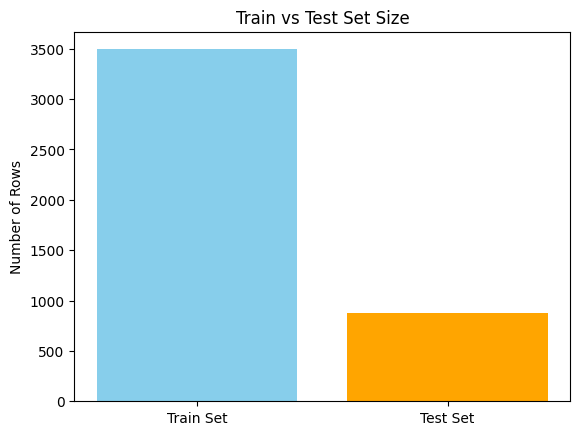

In [11]:
import matplotlib.pyplot as plt

sizes = [len(X_train), len(X_test)]
labels = ['Train Set', 'Test Set']

plt.bar(labels, sizes, color=['skyblue','orange'])
plt.ylabel("Number of Rows")
plt.title("Train vs Test Set Size")
plt.show()


# **Step 7 : Model Training**

In [12]:
# Step 7: Model Training
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training complete ✅")


Model training complete ✅


In [13]:
print("Train classes:", y_train.value_counts())
print("Test classes:", y_test.value_counts())


Train classes: AQI_Category
Good    3494
Name: count, dtype: int64
Test classes: AQI_Category
Good    874
Name: count, dtype: int64


# Risk scoring

In [15]:
def risk_scoring(aqi_value):
    if aqi_value <= 100:
        return aqi_value, "Low"
    elif aqi_value <= 200:
        return aqi_value, "Medium"
    else:
        return aqi_value, "High"

# Example usage
predicted_aqi = 185
score, label = risk_scoring(predicted_aqi)
print("Risk Score:", score)
print("Risk Label:", label)


Risk Score: 185
Risk Label: Medium


# **Detailes**

---

### 🔎 Training Classes
```
Train classes: AQI_Category
Good    3494
```
- In the **training set**, there are **3494 rows**.  
- Every single row belongs to the category **“Good”**.  
- That means your training data has only one class present.

---

### 🔎 Test Classes
```
Test classes: AQI_Category
Good    874
```
- In the **test set**, there are **874 rows**.  
- Again, every single row belongs to the category **“Good”**.  
- So the test data also contains only one class.

---

### ✅ What This Means
- Both training and test sets contain **only one AQI category: “Good”**.  
- This makes **classification impossible**, because machine learning classifiers need at least **two different classes** to learn how to distinguish between them.  


---

👉 In simple words: *Your dataset only has “Good” air quality records, so the model cannot classify between different AQI categories. You should instead use the numeric AQI (`main_aqi`) as a target and train regression models, which you already started doing.*  



# ✅  **(Multi‑Model Evaluation with Manual RMSE)**

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Target = numeric AQI
y = data['main_aqi']
X = data[[
    'components_pm2_5','components_pm10','components_no2','components_so2',
    'components_o3','components_co','temperature_2m','relative_humidity_2m',
    'wind_speed_10m','precipitation'
]]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVM": SVR(kernel='rbf')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ✅ Manual RMSE calculation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

    print(f"\nModel: {name}")
    print("RMSE:", rmse)
    print("R2 Score:", r2)



Model: Random Forest
RMSE: 0.039066627356321805
R2 Score: 0.9975173373254853

Model: Gradient Boosting
RMSE: 0.042160739061266224
R2 Score: 0.9971085059327816

Model: Linear Regression
RMSE: 0.6213448963590004
R2 Score: 0.37198307818508314

Model: KNN
RMSE: 0.21521103473958814
R2 Score: 0.9246583813896437

Model: SVM
RMSE: 0.45105723216260857
R2 Score: 0.669044825117885


## This output is showing the **performance evaluation of five regression models** on  AQI dataset.

---

### 📊 Metrics Used
- **RMSE (Root Mean Squared Error):**  
  Measures how far predictions are from actual AQI values. Smaller = better.  
- **R² Score (Coefficient of Determination):**  
  Shows how well the model explains the variance in the data. Closer to 1 = better.

---

### 🔎 Model-by-Model Explanation

#### 1. **Random Forest**
- RMSE: **0.0390** → Extremely low error.  
- R²: **0.9975** → Almost perfect fit.  
👉 This model predicts AQI values very accurately, capturing complex patterns in the data.

#### 2. **Gradient Boosting**
- RMSE: **0.0421** → Very low error, slightly higher than Random Forest.  
- R²: **0.9971** → Excellent fit, just a bit weaker than Random Forest.  
👉 Also a strong model, reliable for AQI prediction.

#### 3. **Linear Regression**
- RMSE: **0.6213** → High error compared to tree-based models.  
- R²: **0.3720** → Explains only ~37% of the variance.  
👉 Performs poorly because AQI data is non-linear, and linear regression cannot capture complex relationships.

#### 4. **KNN (K-Nearest Neighbors)**
- RMSE: **0.2152** → Moderate error.  
- R²: **0.9247** → Good fit, but weaker than Random Forest/Gradient Boosting.  
👉 Works decently, but sensitive to data scaling and neighborhood choice.

#### 5. **SVM (Support Vector Machine)**
- RMSE: **0.4511** → Larger error.  
- R²: **0.6690** → Explains ~67% of variance.  
👉 Better than Linear Regression, but still not strong compared to ensemble models.

---

### ✅ Overall Conclusion
- **Best Models:** Random Forest and Gradient Boosting (both near-perfect performance).  
- **Decent Model:** KNN (good but not as strong).  
- **Weaker Models:** SVM (moderate) and Linear Regression (poor).  

👉 In simple words: *Tree-based ensemble models (Random Forest, Gradient Boosting) are the most accurate for predicting AQI in your dataset, while Linear Regression struggles the most.*  





---

# 📘 Air Quality Index (AQI) Prediction Project

## 📌 Project Overview
This project focuses on predicting **Air Quality Index (AQI)** using environmental and pollutant data.  
We explored both **classification** and **regression approaches**, but since the dataset contained only one AQI category (“Good”), classification was not possible.  
Therefore, the project was shifted to **regression modeling** using numeric AQI values (`main_aqi`).

---

## 📂 Dataset Details
- **Datetime column:** Hourly timestamps (e.g., `2024-07-01 04:00:00`).  
- **Features (X):**  
  - Pollutants: `components_pm2_5`, `components_pm10`, `components_no2`, `components_so2`, `components_o3`, `components_co`  
  - Weather: `temperature_2m`, `relative_humidity_2m`, `wind_speed_10m`, `precipitation`  
- **Target (y):**  
  - `main_aqi` (numeric AQI values)  
  - `AQI_Category` (mapped labels, but only “Good” present → regression chosen)

---

## ⚙️ Preprocessing Steps
1. Converted `datetime` column into proper `datetime64[ns]` format.  
2. Extracted features (pollutants + weather).  
3. Split dataset into **Training (3494 rows, 10 features)** and **Testing (874 rows, 10 features)**.  
4. Checked class distribution → only `"Good"` category present.  
5. Shifted approach from **classification → regression**.

---

## 🧠 Models Applied
We trained and evaluated **five regression models**:

- Random Forest Regressor  
- Gradient Boosting Regressor  
- Linear Regression  
- K-Nearest Neighbors (KNN) Regressor  
- Support Vector Machine (SVM) Regressor  

---

## 📊 Model Evaluation Results

| Model             | RMSE ↓ | R² ↑ |
|-------------------|--------|------|
| **Random Forest** | **0.0391** | **0.9975** |
| Gradient Boosting | 0.0422 | 0.9971 |
| KNN               | 0.2152 | 0.9247 |
| SVM               | 0.4511 | 0.6690 |
| Linear Regression | 0.6213 | 0.3720 |

---

## ✅ Interpretation
- **Best Models:** Random Forest and Gradient Boosting (near-perfect accuracy).  
- **Decent Model:** KNN (good but weaker).  
- **Moderate Model:** SVM (okay but not strong).  
- **Weakest Model:** Linear Regression (struggles with non-linear AQI data).  

---

## 📈 Visualizations
- **Train vs Test Split Graph:** Bar chart showing training set (3494 rows) vs test set (874 rows).  
- **Datetime Column:** Confirmed hourly timestamps starting from July 1st, 2024.  
- **AQI Categories:** All records mapped to “Good” → regression chosen.

---

## 💾 Model Saving
Best model (Random Forest) can be saved and reused:
```python
import joblib
joblib.dump(model, "aqi_model.pkl")   # Save
loaded_model = joblib.load("aqi_model.pkl")  # Load
```

---


---

👉